<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 고속도로 데이터 불러오기 (xlxs 파일을 csv 파일로 변환 후 구글 드라이브에 업로드된 파일을 불러오기)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hw3_data.csv', encoding='utf8')

In [ ]:
# 데이터 정상 마운팅 유무 확인(처음 5행 출력)
data.head()

,date,hour,conzoneID,speed(avg),volume,conzoneLength,directiontype,startnodeID,endnodeID,Number of lanes,expressway number,Speed Limit,O-D,Existence of bus lanes
0,2024-04-16,18,0010CZE010,88.82,1391,1820,E,4,446,3,10,100,구서IC-영락IC,0
1,2024-04-16,18,0010CZE011,97.08,1381,1990,E,446,486,3,10,100,영락IC-부산TG,0
2,2024-04-16,18,0010CZE020,0.00,-1,1070,E,486,447,3,10,100,부산TG-노포,0
3,2024-04-16,18,0010CZE030,0.00,-1,7780,E,447,669,3,10,100,노포IC-노포JC,0
4,2024-04-16,18,0010CZE035,91.40,478,7280,E,669,155,2,10,100,노포JC-양산JC,0


연속형 변수 : speed(avg), volume, conzoneLength, Number of lanes, Expressway number

범주형 변수 : data, hour, conzoneID, startnodeID, endnodeID, speed limit, O-D, Existence od bus lanes

클러스터링에 사용할 데이터 변수 : speed(avg), volume, conzoneLength, directiontype, number of lanes, existence of bus lanes

In [ ]:
# 데이터 누락값과 데이터타입을 파악
data.info()

# volume이 -1인 행 삭제 (이상치 제거)
data = data[data['volume'] != -1]

# 삭제된 행 확인
print("volume이 -1인 행 삭제 후 데이터 개수:", len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    1556 non-null   object 
 1   hour                    1556 non-null   int64  
 2   conzoneID               1556 non-null   object 
 3   speed(avg)              1556 non-null   float64
 4   volume                  1556 non-null   int64  
 5   conzoneLength           1556 non-null   int64  
 6   directiontype           1556 non-null   object 
 7   startnodeID             1556 non-null   int64  
 8   endnodeID               1556 non-null   int64  
 9   Number of lanes         1556 non-null   int64  
 10  expressway number       1556 non-null   int64  
 11  Speed Limit             1556 non-null   int64  
 12  O-D                     1556 non-null   object 
 13  Existence of bus lanes  1556 non-null   object 
dtypes: float64(1), int64(8), object(5)
memor

In [ ]:
# directiontype을 원핫인코딩 (chatGPT 추천 데이터 전처리 방식)
data = pd.get_dummies(data, columns=['directiontype', 'Existence of bus lanes'])

In [ ]:
print(data.head())

         date  hour   conzoneID  speed(avg)  volume  conzoneLength  \
0  2024-04-16    18  0010CZE010       88.82    1391           1820   
1  2024-04-16    18  0010CZE011       97.08    1381           1990   
4  2024-04-16    18  0010CZE035       91.40     478           7280   
5  2024-04-16    18  0010CZE040       93.20    1635           5080   
6  2024-04-16    18  0010CZE050       93.32    1357          14110   

   startnodeID  endnodeID  Number of lanes  expressway number  Speed Limit  \
0            4        446                3                 10          100   
1          446        486                3                 10          100   
4          669        155                2                 10          100   
5          155        453                4                 10          100   
6          453        652                3                 10          100   

          O-D  directiontype_E  directiontype_S  Existence of bus lanes_   \
0   구서IC-영락IC             True   

In [ ]:
# 데이터 스케일링 진행

# 클러스터링에 사용할 데이터(범주형 변수)를 선택하여 변수에 할당'
selected_columns = ['speed(avg)', 'volume', 'conzoneLength', 'Number of lanes', 'directiontype_E', 'directiontype_S', 'Existence of bus lanes_0', 'Existence of bus lanes_1']

# Min-Max 스케일러 객체 생성 (chatGPT 추천 데이터 스케일링 방식)
scaler = MinMaxScaler()

# 선택된 열들에 대해 스케일링 적용
data[selected_columns] = scaler.fit_transform(data[selected_columns])

In [ ]:
print("Min-Max Scaling 결과:")
for column in selected_columns:
    print(f"{column}: 최소값 = {data[column].min()}, 최대값 = {data[column].max()}")

Min-Max Scaling 결과:
speed(avg): 최소값 = 0.0, 최대값 = 1.0000000000000002
volume: 최소값 = 0.0, 최대값 = 1.0
conzoneLength: 최소값 = 0.0, 최대값 = 1.0
Number of lanes: 최소값 = 0.0, 최대값 = 1.0
directiontype_E: 최소값 = 0.0, 최대값 = 1.0
directiontype_S: 최소값 = 0.0, 최대값 = 1.0
Existence of bus lanes_0: 최소값 = 0.0, 최대값 = 1.0
Existence of bus lanes_1: 최소값 = 0.0, 최대값 = 1.0


In [ ]:
data.head()

,date,hour,conzoneID,speed(avg),volume,conzoneLength,startnodeID,endnodeID,Number of lanes,expressway number,Speed Limit,O-D,directiontype_E,directiontype_S,Existence of bus lanes_,Existence of bus lanes_0,Existence of bus lanes_1
0,2024-04-16,18,0010CZE010,0.519973,0.198479,0.061340,4,446,0.500000,10,100,구서IC-영락IC,1.0,0.0,False,1.0,0.0
1,2024-04-16,18,0010CZE011,0.576087,0.197044,0.067777,446,486,0.500000,10,100,영락IC-부산TG,1.0,0.0,False,1.0,0.0
4,2024-04-16,18,0010CZE035,0.537500,0.067451,0.268080,669,155,0.333333,10,100,노포JC-양산JC,1.0,0.0,False,1.0,0.0
5,2024-04-16,18,0010CZE040,0.549728,0.233496,0.184778,155,453,0.666667,10,100,양산JC-양산IC,1.0,0.0,False,1.0,0.0
6,2024-04-16,18,0010CZE050,0.550543,0.193599,0.526694,453,652,0.500000,10,100,양산IC-통도사Hi,1.0,0.0,False,1.0,0.0


In [ ]:
# 클러스터링

# K-means 모델 생성
# 일단, 클러스터 개수 3으로 임의 설정
kmeans = KMeans(n_clusters=3, random_state=42)

# 클러스터링 수행
clusters = kmeans.fit_predict(data[selected_columns])

# 클러스터링 결과 확인
data[selected_columns]['Cluster'] = clusters
print(data[selected_columns].head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   speed(avg)    volume  conzoneLength  Number of lanes  directiontype_E  \
0    0.519973  0.198479       0.061340         0.500000              1.0   
1    0.576087  0.197044       0.067777         0.500000              1.0   
4    0.537500  0.067451       0.268080         0.333333              1.0   
5    0.549728  0.233496       0.184778         0.666667              1.0   
6    0.550543  0.193599       0.526694         0.500000              1.0   

   directiontype_S  Existence of bus lanes_0  Existence of bus lanes_1  
0              0.0                       1.0                       0.0  
1              0.0                       1.0                       0.0  
4              0.0                       1.0                       0.0  
5              0.0                       1.0                       0.0  
6              0.0                       1.0                       0.0  


<ipython-input-133-f500fefb19f1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[selected_columns]['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

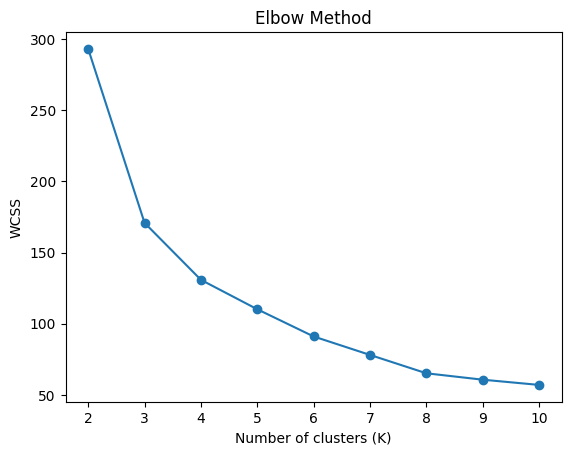

In [ ]:
# 최적의 클러스터 개수 찾기

# K 값과 WCSS 값을 저장할 리스트 생성
k_values = range(2, 11)
wcss_values = []

# 각 K에 대해 K-means 모델 생성 및 학습하여 WCSS 값을 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[selected_columns])
    wcss_values.append(kmeans.inertia_)

# WCSS 값을 시각화하여 엘보우 지점 찾기
plt.plot(k_values, wcss_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# 최적의 k값으로 클러스터링 다시 진행
# 그래프를 통한 엘보우 기법으로 최적의 k값이 3임을 확인

# 스케일링한 변수들만 추출하여 새로운 데이터 생성
scaled_data = data[['speed(avg)', 'volume', 'conzoneLength', 'Number of lanes', 'directiontype_E', 'directiontype_S', 'Existence of bus lanes_0', 'Existence of bus lanes_1']]

# K-means 모델 생성 및 학습
km = KMeans(n_clusters=3, random_state=42)
km.fit(scaled_data)

# 각 데이터 포인트가 속한 클러스터의 레이블
labels = km.labels_

# 클러스터 중심 확인
cluster_centers = km.cluster_centers_

# 클러스터링 결과 출력
print("각 데이터 포인트의 클러스터 레이블:")
print(labels)
print("\n각 클러스터의 중심:")
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


각 데이터 포인트의 클러스터 레이블:
[0 0 0 ... 1 1 1]

각 클러스터의 중심:
[[ 5.61538512e-01  2.06752628e-01  2.71011114e-01  3.95534290e-01
   1.00000000e+00 -3.33066907e-16  9.96810207e-01  8.32667268e-17]
 [ 5.61361294e-01  2.08350579e-01  2.68245381e-01  3.97335423e-01
   3.88578059e-16  1.00000000e+00  9.96865204e-01  1.11022302e-16]
 [ 5.30479789e-01  3.95109788e-01  1.73793071e-01  7.39583333e-01
   5.12500000e-01  4.87500000e-01 -2.22044605e-16  1.00000000e+00]]


In [ ]:
# 각 레이블의 샘플 수
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([627, 638,  80]))


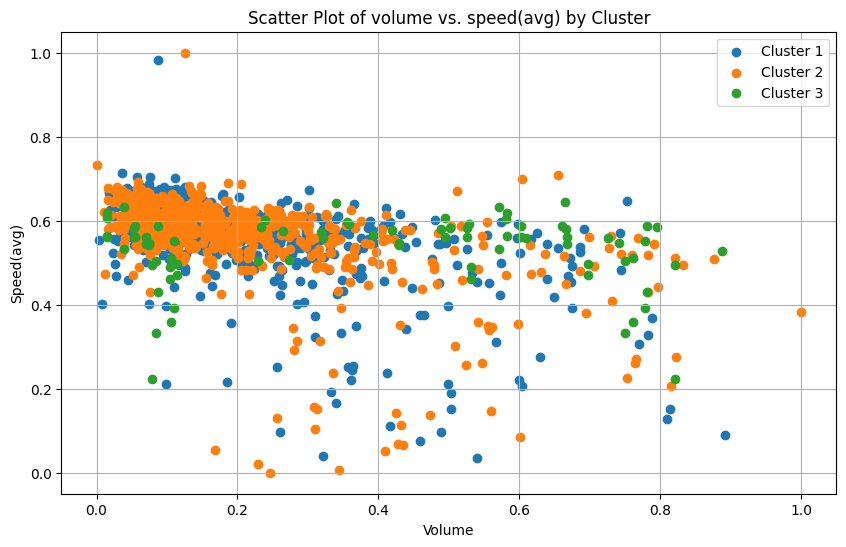

In [ ]:
# 클러스터링 시각화

# 산점도 그리기
plt.figure(figsize=(10, 6))
for cluster_label in range(3):
    plt.scatter(data[labels == cluster_label]['volume'],
                data[labels == cluster_label]['speed(avg)'],
                label=f'Cluster {cluster_label + 1}')

# 그래프 스타일 및 레이블 설정
plt.title('Scatter Plot of volume vs. speed(avg) by Cluster')
plt.xlabel('Volume')
plt.ylabel('Speed(avg)')
plt.legend()
plt.grid(True)
plt.show()

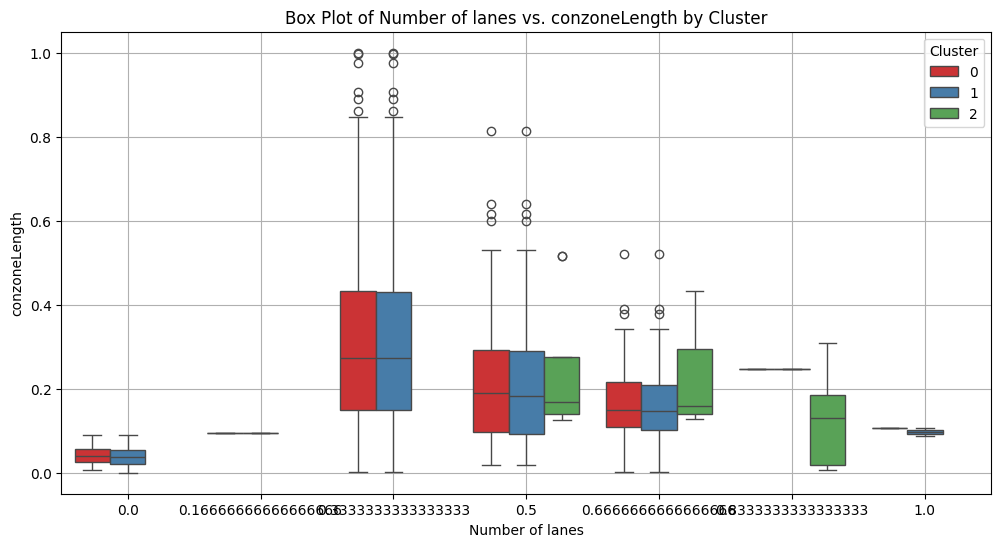

In [ ]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Number of lanes', y='conzoneLength', hue=labels, palette='Set1')
plt.title('Box Plot of Number of lanes vs. conzoneLength by Cluster')
plt.xlabel('Number of lanes')
plt.ylabel('conzoneLength')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# 클러스터링 결과 텍스트 출력

def summarize_clusters(scaled_data, cluster_labels, selected_columns):
    cluster_summary = {}

    for cluster_label in set(cluster_labels):
        cluster_data = data[cluster_labels == cluster_label]
        cluster_size = len(cluster_data)
        cluster_center = cluster_data[selected_columns].mean()
        cluster_feature_values = {}

        for column in selected_columns:
            if cluster_data[column].dtype in ['int64', 'float64']:
                cluster_feature_values[column] = cluster_data[column].mean()

        cluster_summary[cluster_label] = {
            'size': cluster_size,
            'center': cluster_center,
            'feature_values': cluster_feature_values
        }

    return cluster_summary

# 클러스터링 결과 요약
cluster_summary = summarize_clusters(data, clusters, selected_columns)

# 각 클러스터 요약 정보 출력
for cluster_label, summary in cluster_summary.items():
    print(f"Cluster {cluster_label}:")
    print(f"Size: {summary['size']}")  # 클러스터 크기 출력
    print("Center:")
    print(summary['center'])  # 클러스터 중심 좌표 출력
    print("Feature Values:")
    for feature, value in summary['feature_values'].items():
        print(f"- {feature}: {value}")  # 각 특성의 평균값 출력
    print("\n")

Cluster 0:
Size: 627
Center:
speed(avg)                  0.561539
volume                      0.206753
conzoneLength               0.271011
Number of lanes             0.395534
directiontype_E             1.000000
directiontype_S             0.000000
Existence of bus lanes_0    0.996810
Existence of bus lanes_1    0.000000
dtype: float64
Feature Values:
- speed(avg): 0.5615385115456626
- volume: 0.2067526280998394
- conzoneLength: 0.27101111354683566
- Number of lanes: 0.39553429027113235
- directiontype_E: 1.0
- directiontype_S: 0.0
- Existence of bus lanes_0: 0.9968102073365231
- Existence of bus lanes_1: 0.0


Cluster 1:
Size: 638
Center:
speed(avg)                  0.561361
volume                      0.208351
conzoneLength               0.268245
Number of lanes             0.397335
directiontype_E             0.000000
directiontype_S             1.000000
Existence of bus lanes_0    0.996865
Existence of bus lanes_1    0.000000
dtype: float64
Feature Values:
- speed(avg): 0.5613612